In [123]:
import os
import pandas as pd

# Set the directory path
directory_path = r'D:\Github\robogithub\cfg\robots'

# Define a global variable to hold the DataFrame
robot_df = None

def parse_cfg_file(file_path):
    with open(file_path, 'r') as file:
        cfg_data = file.readlines()

    robot_info = {}

    for line in cfg_data:
        line = line.strip()
        if line.startswith('"name"'):
            robot_info['Name'] = line.split('"')[3]
        elif line.startswith('"class"'):
            robot_info['Class'] = line.split('"')[3]
        elif line.startswith('"subclass"'):
            subclass = line.split('"')[3]
            if subclass:
                robot_info['Subclass'] = subclass
            else:
                robot_info['Subclass'] = robot_info.get('Role', '')
        elif line.startswith('"health"'):
            robot_info['Health'] = int(line.split('"')[3])
        elif line.startswith('"health_bonus_per_player"'):
            robot_info['Health_Bonus_Per_Player'] = int(line.split('"')[3])
        elif line.startswith('"rc_cost"'):
            rc_cost = line.split('"')[3]
            if rc_cost:
                robot_info['RC_Cost'] = float(rc_cost)
            else:
                robot_info['RC_Cost'] = 0

    return robot_info


def main():
    global robot_df
    global all_bots_df
    # Initialize an empty list to store robot information dictionaries
    robot_data = []

    # Traverse through the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.cfg'):
            file_path = os.path.join(directory_path, filename)
            robot_info = parse_cfg_file(file_path)
            robot_data.append(robot_info)

    # Convert the list of dictionaries into a Pandas DataFrame
    robot_df = pd.DataFrame(robot_data)

    # Reorder the columns as per your requirement
    robot_df = robot_df[['Name', 'Class', 'Subclass', 'Health', 'RC_Cost', 'Health_Bonus_Per_Player']]
    all_bots_df = robot_df
    robot_df.fillna(0, inplace=True)
    # for i in range(0, 24):
    #     column_name = f"{i}_players"
    #     robot_df[column_name] = robot_df['Health'] + (robot_df['Health_Bonus_Per_Player'] * i)
    # Display the DataFrame
    print(robot_df)

if __name__ == "__main__":
    main()


                 Name    Class  Subclass  Health  RC_Cost  \
0              ZOOMER    Heavy    ZOOMER   90000  50000.0   
1             Demopan  DemoMan     Melee    7200     50.0   
2               Nuker  DemoMan  Grenades    5000     50.0   
3       Kommisar Krit    Heavy   Hitscan    6800     60.0   
4           SkillTron     Pyro    Flames    5000     50.0   
..                ...      ...       ...     ...      ...   
111    Hacked Slasher  Demoman      Tank    5000     12.0   
112         Big Chief    Heavy      Tank    5000     12.0   
113            Pancop    Heavy      Tank    5000     25.0   
114  Sensor Armstrong    Heavy      Tank    5000     25.0   
115           Back Up  Soldier      Tank    3500     20.0   

     Health_Bonus_Per_Player  
0                      250.0  
1                      100.0  
2                      100.0  
3                      100.0  
4                      100.0  
..                       ...  
111                    150.0  
112                

In [124]:
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

filtered_df = robot_df[robot_df['Health'] < 90000]

filtered_df["18 player health"] = (robot_df["Health_Bonus_Per_Player"] * 18) + robot_df["Health"] 
# Filter out robots with health bonus per player equal to 0
robot_df_hp_scale = robot_df[robot_df['Health_Bonus_Per_Player'] > 0]

# Grouping and combining names for duplicates



robot_df['Combined_Name'] = robot_df.groupby(['Health', 'Health_Bonus_Per_Player'])['Name'].transform(lambda x: ', '.join(x))

# Drop duplicate rows
robot_df.drop_duplicates(subset=['Health', 'Health_Bonus_Per_Player'], keep='first', inplace=True)

# Get unique subclasses
subclasses = robot_df['Subclass'].unique()



C:\Users\mariu\AppData\Local\Temp\ipykernel_13320\1775427555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["18 player health"] = (robot_df["Health_Bonus_Per_Player"] * 18) + robot_df["Health"]


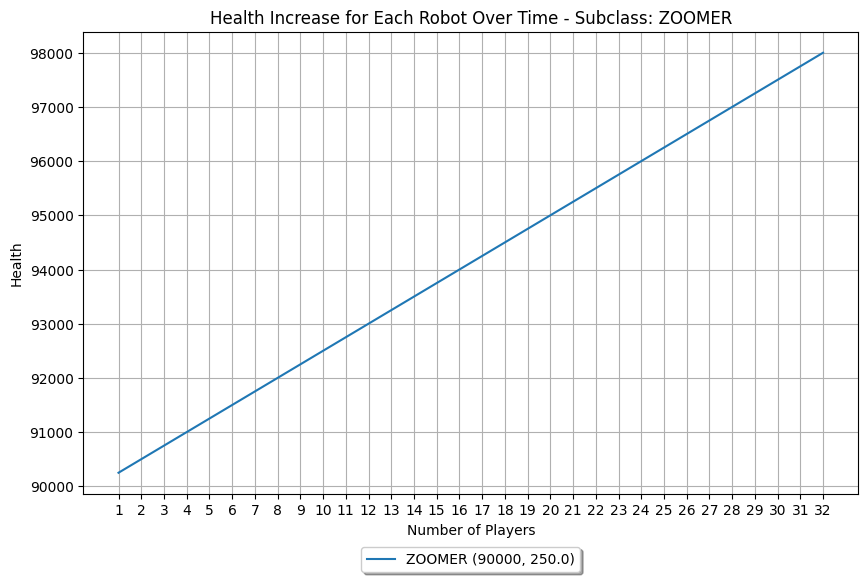

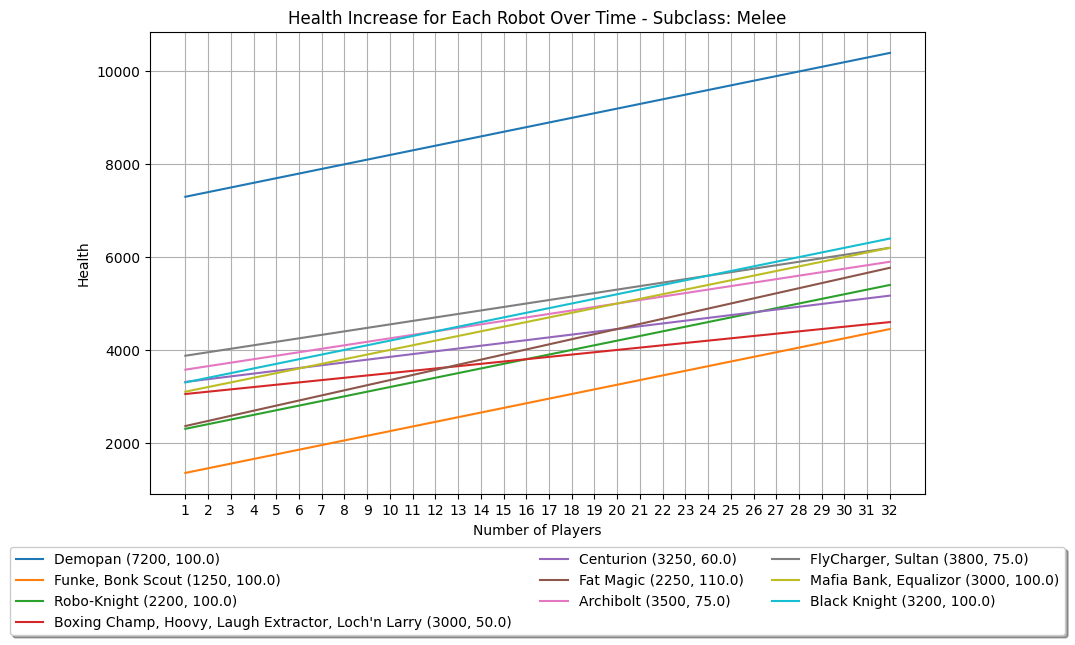

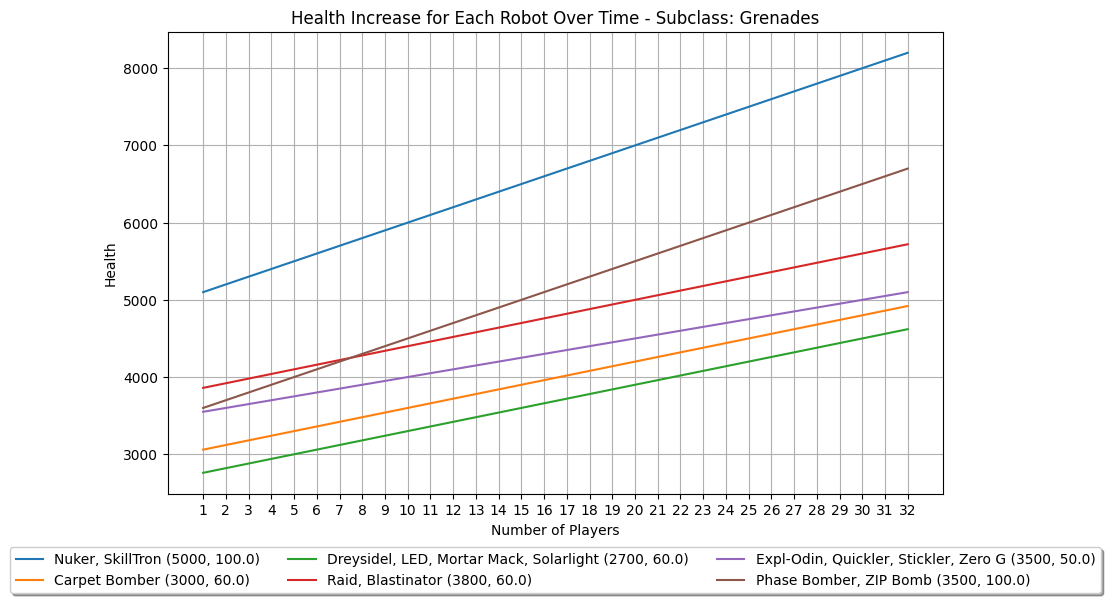

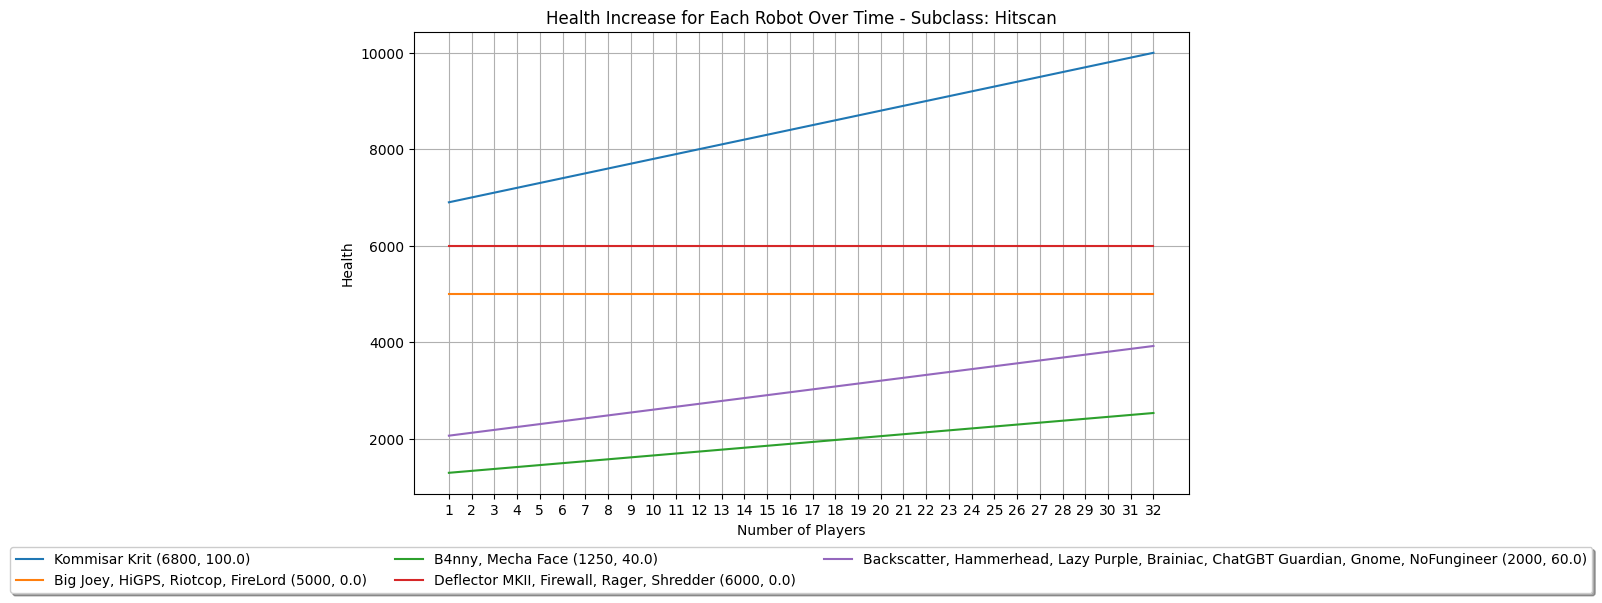

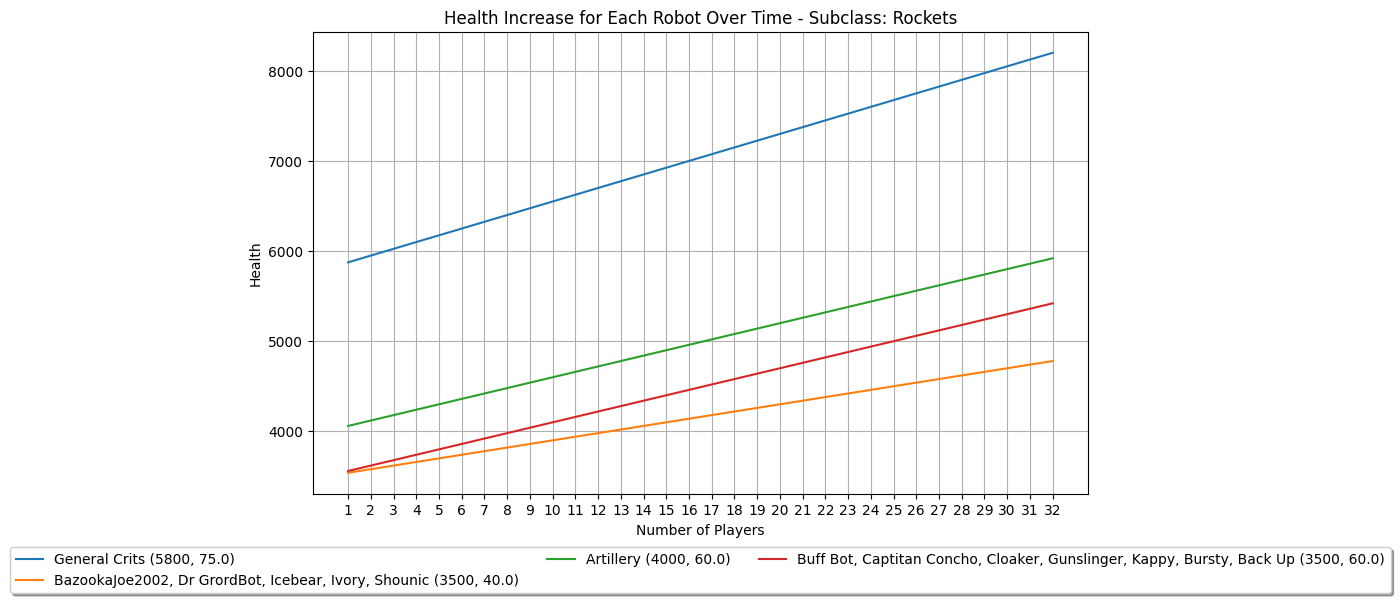

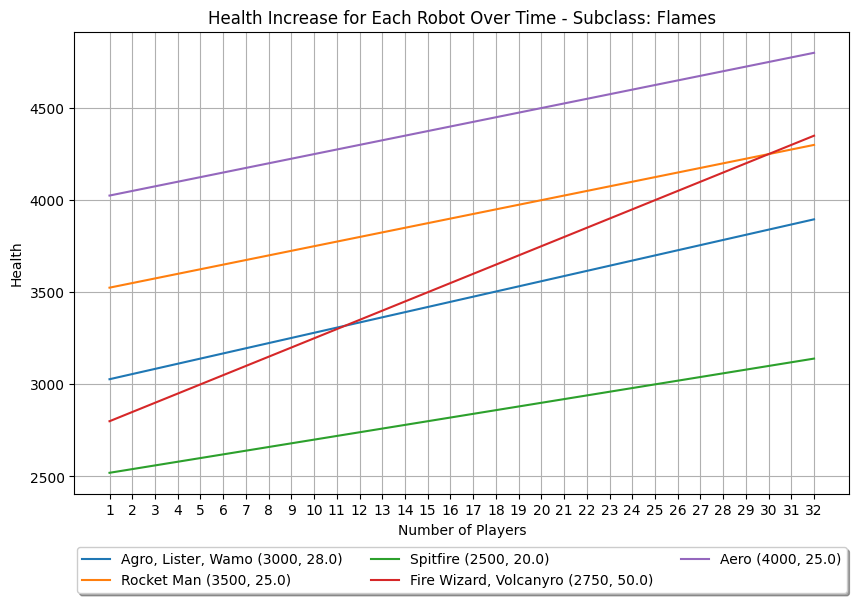

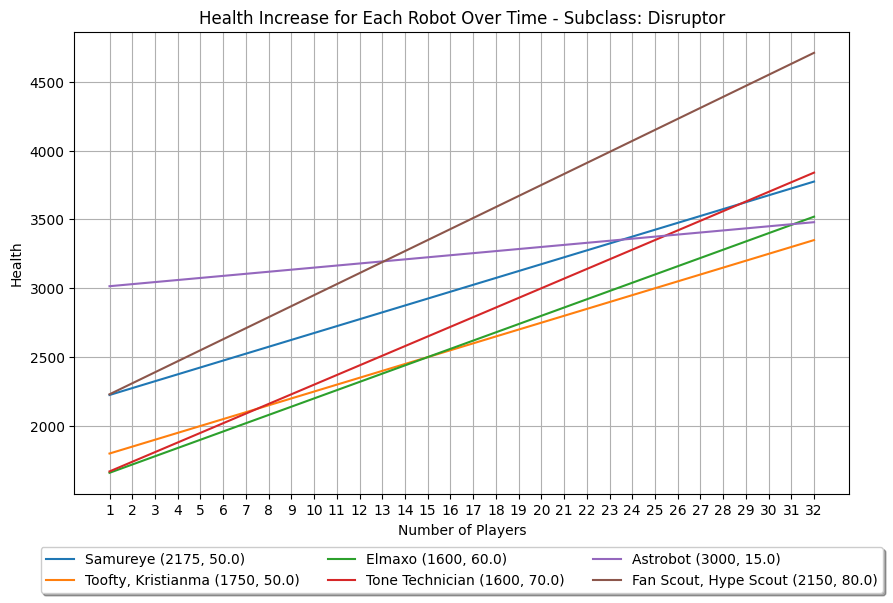

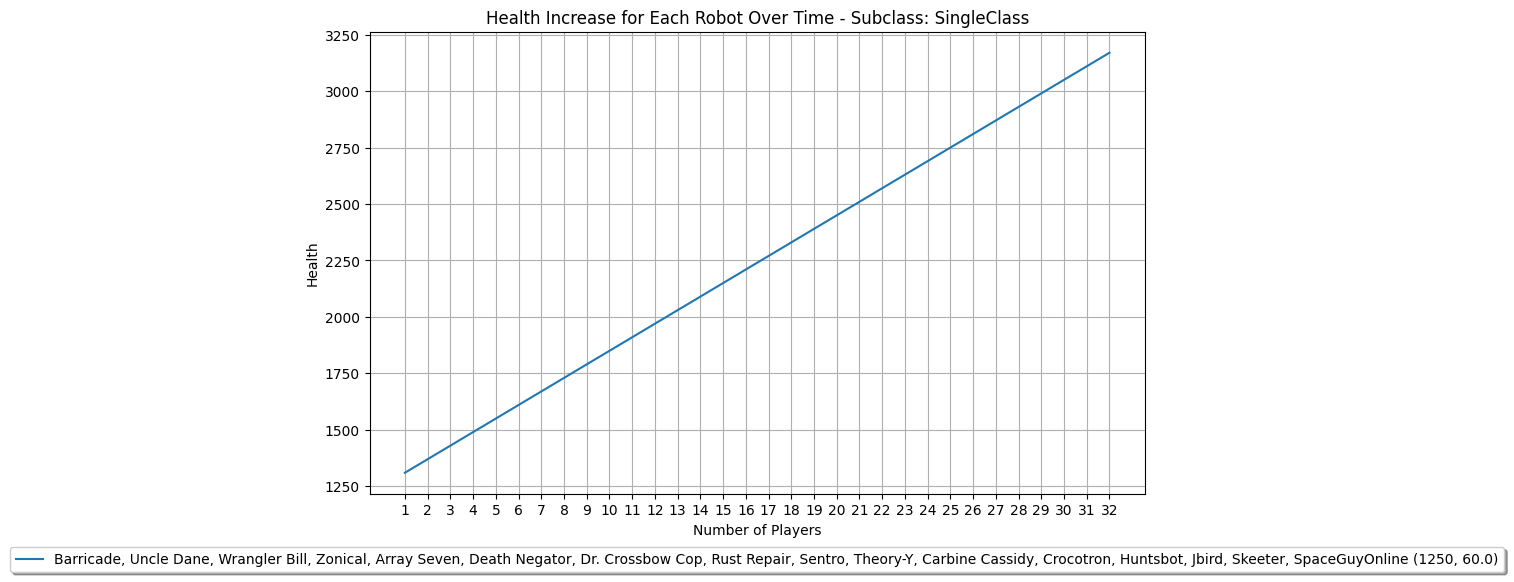

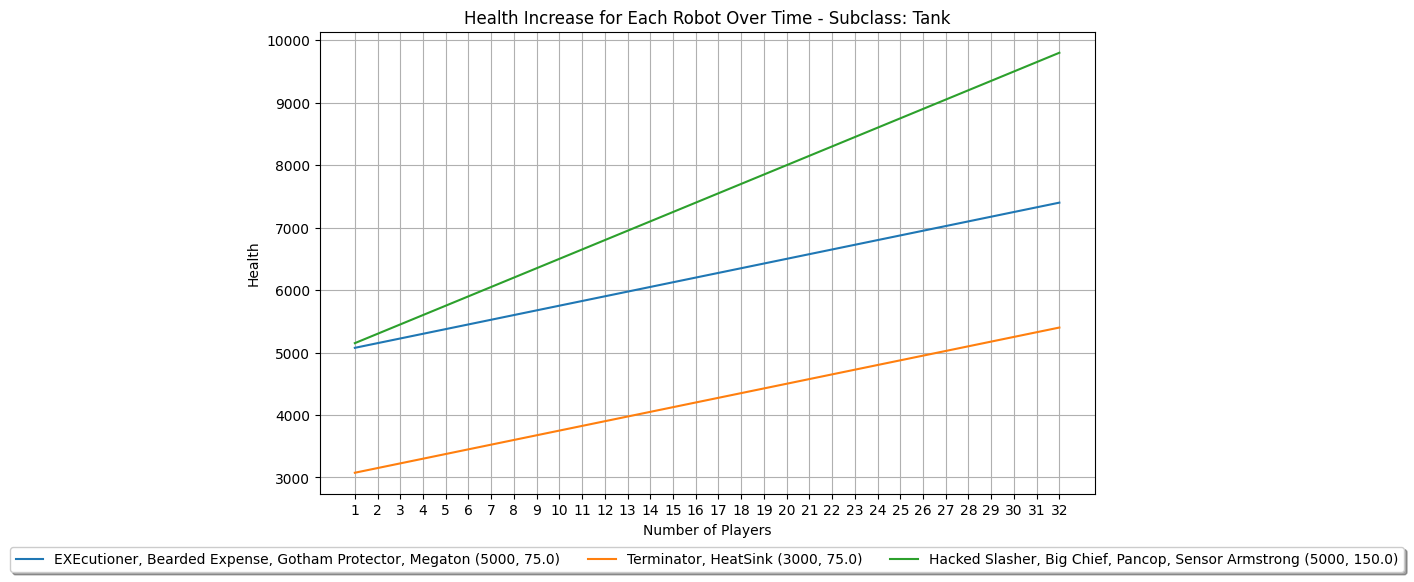

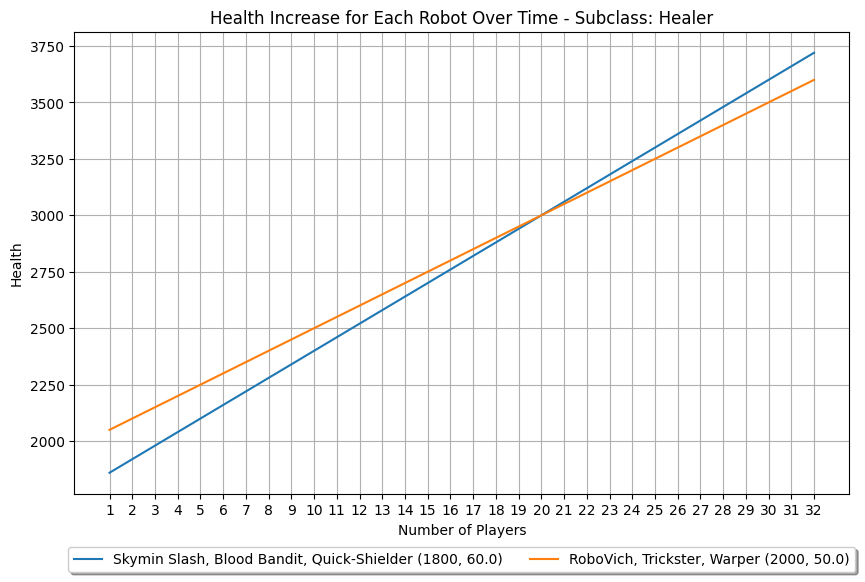

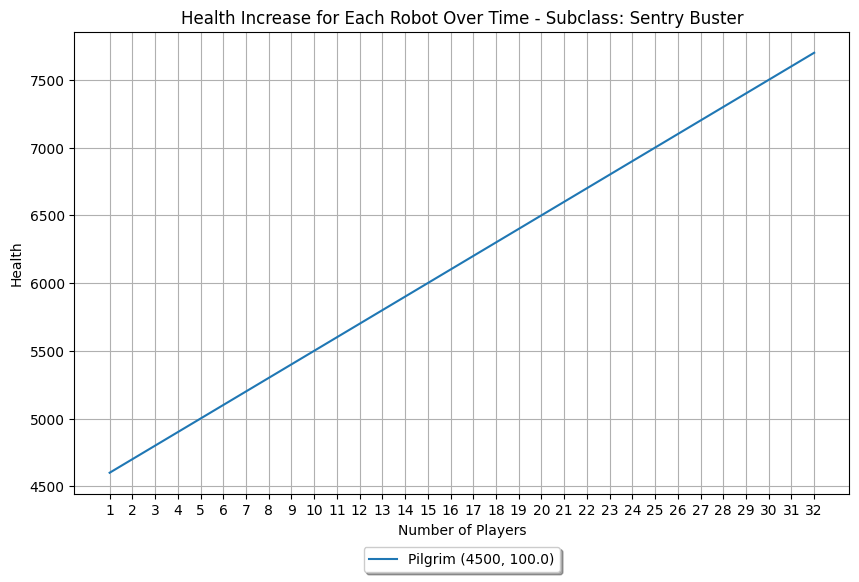

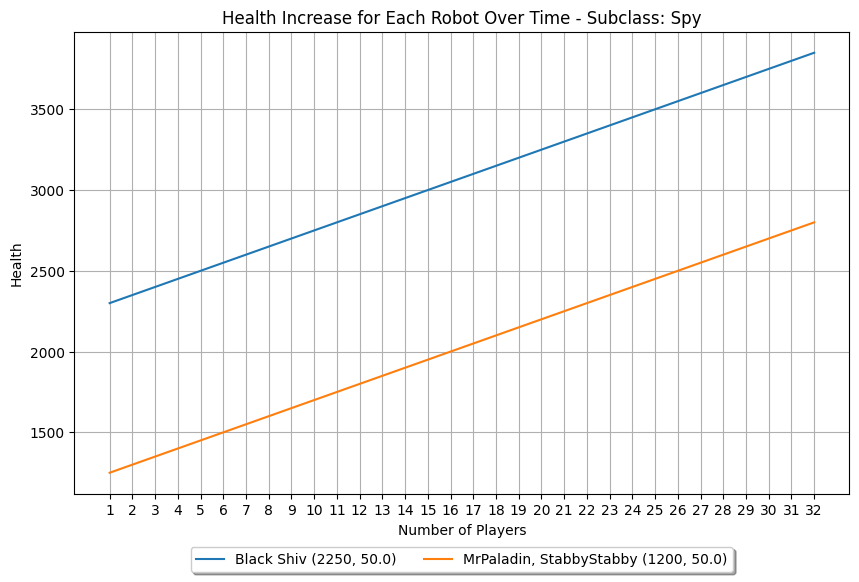

In [125]:
# Plotting for each subclass
for subclass in subclasses:
    subclass_df = robot_df[robot_df['Subclass'] == subclass]
    
    plt.figure(figsize=(10, 6))
    labels = set()  # To store unique labels
    for index, row in subclass_df.iterrows():
        health_over_time = [row['Health'] + (row['Health_Bonus_Per_Player'] * i) for i in range(1, 33)]
        label = f"{row['Combined_Name']} ({row['Health']}, {row['Health_Bonus_Per_Player']})"  # Combined names in label
        if label not in labels:
            plt.plot(range(1, 33), health_over_time, label=label)
            labels.add(label)

    plt.xlabel('Number of Players')
    plt.ylabel('Health')
    plt.title(f'Health Increase for Each Robot Over Time - Subclass: {subclass}')
    plt.grid(True)
    plt.xticks(range(1, 33))

    # Adjust legend position below the graph
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)

    plt.show()


In [126]:
markdown_table = filtered_df.to_markdown()

In [135]:
markdown_table

"|     | Name             | Class    | Subclass      |   Health |   RC_Cost |   Health_Bonus_Per_Player |   18 player health |\n|----:|:-----------------|:---------|:--------------|---------:|----------:|--------------------------:|-------------------:|\n|   1 | Demopan          | DemoMan  | Melee         |     7200 |        50 |                       100 |               9000 |\n|   2 | Nuker            | DemoMan  | Grenades      |     5000 |        50 |                       100 |               6800 |\n|   3 | Kommisar Krit    | Heavy    | Hitscan       |     6800 |        60 |                       100 |               8600 |\n|   4 | SkillTron        | Pyro     | Flames        |     5000 |        50 |                       100 |               6800 |\n|   5 | General Crits    | Soldier  | Rockets       |     5800 |        50 |                        75 |               7150 |\n|   6 | Agro             | Pyro     | Flames        |     3000 |         0 |                        28 |      

In [127]:
# The filename of the markdown file you want to create or overwrite
filename = 'robot_health_post_update.md'

# Open the file in write mode ('w') and write the markdown table to it
with open(filename, 'w') as file:
    file.write(filtered_df.to_markdown())

In [128]:
# pre_update_df = pd.read_csv(r'D:\temp\old_hp.csv')

In [129]:
# pre_update_df["Health Before Patch"] = pre_update_df["Health"]
# pre_update_df["Health_Bonus_Per_Player Before Patch"] = pre_update_df["Health_Bonus_Per_Player"]

# pre_update_df = pre_update_df[["Name", "Health Before Patch", "Health_Bonus_Per_Player Before Patch"]]

In [130]:
# pre_update_df

In [131]:
# result = pd.merge(filtered_df, pre_update_df, on='Name', how='left')

In [132]:


# result.columns = [col.replace('_', ' ') for col in result.columns]
# result

In [133]:
from IPython.display import Markdown

In [134]:
# markdown_table = result.to_markdown()

{{markdown_table}}